(PROGLINEAL)=

# 4.2 Programación lineal (PL) y método símplex

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -p 8787:8787 -d palmoreck/jupyterlab_optimizacion_2:3.0.0`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion_2`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion_2:3.0.0` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion_2).

```

---

```{admonition} Al final de esta nota el y la lectora:
:class: tip

*

```

```{sidebar} Un poco de historia ...

El desarrollo de la programación lineal (PL) ha sido clasificado como uno de los avances científicos más importantes de mediados del siglo XX. Es quizás el modelo prototipo de la optimización con restricciones. El efecto que ha tenido en la práctica y en áreas del conocimiento desde 1950 es en verdad grande. El tipo más común de aplicación abarca el problema general de asignar de la mejor manera posible, esto es, de forma óptima, recursos limitados a actividades que compiten entre sí por ellos. Con más precisión, se desea elegir el nivel de ciertas actividades que compiten por recursos escasos necesarios para realizarlas y se puedan asignar recursos a tales actividades. El desarrollo por Dantzig del método símplex para resolver programas lineales en los $40$'s marcó el inicio de la era moderna en optimización. 

La PL utiliza un modelo matemático para describir el problema. El adjetivo lineal significa que todas las funciones del modelo deben ser funciones lineales. En este caso, la palabra programación no se refiere a términos computacionales; en esencia es sinónimo de planeación. Por lo tanto, la PL involucra la planeación de actividades para obtener un resultado óptimo; esto es, el resultado que mejor alcance la meta establecida, de acuerdo con el modelo matemático, entre todas las alternativas factibles.

Aunque la asignación de recursos a las actividades es la aplicación más frecuente en PL, cualquier problema cuyo  modelo se ajuste al formato general del modelo de PL, es un problema de PL.

```

Un programa lineal (PL) **en su forma estándar** es un problema de optimización con una función lineal objetivo, un conjunto de restricciones lineales y un conjunto de restricciones no negativas impuestas a las variables. Es un **modelo de optimización** de la forma:

$$\min c^Tx$$

$$\text{sujeto a:}$$

$$Ax=b$$

$$x \geq 0$$

donde: $A \in \mathbb{R}^{m \times n}$ y se **asume** $m \leq n$ y tiene *rank* completo por renglones y la última desigualdad se refiere a que todas las componentes del vector $x$ son mayores o iguales a cero.

## Ejemplo: flujo en redes

Considérese el problema de satisfacer la demanda de todos los nodos con etiquetas "A, B, C, D" y "E" de la siguiente red de acuerdo a las capacidades de cada uno de ellos al menor costo posible:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

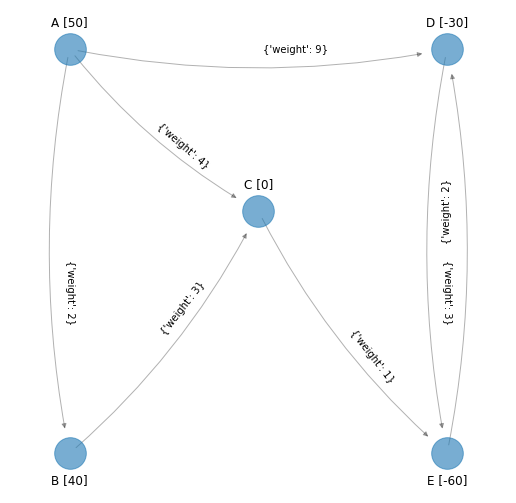

In [2]:
nodes_pos = [[0.18181818181818182, 0.7272727272727273],
             [0.18181818181818182, 0.2727272727272727],
             [0.5454545454545454, 0.2727272727272727],
             [0.5454545454545454, 0.7272727272727273],
             [0.36363636363636365, 0.5454545454545454]]

nodes = ['A', 'B', 'E', 'D', 'C']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_min_cost_flow = nx.DiGraph()

G_min_cost_flow.add_node('A', demand = 50, node_and_demand="A [50]")
G_min_cost_flow.add_node('B', demand = 40, node_and_demand="B [40]")
G_min_cost_flow.add_node('C', demand = 0, node_and_demand="C [0]")
G_min_cost_flow.add_node('D', demand = -30, node_and_demand="D [-30]")
G_min_cost_flow.add_node('E', demand = -60, node_and_demand="E [-60]")

edge_labels_min_cost_flow = {('A', 'B'): {"weight": 2},
                             ('A', 'C'): {"weight": 4},
                             ('A', 'D'): {"weight": 9},
                             ('B', 'C'): {"weight": 3},
                             ('C', 'E'): {"weight": 1},
                             ('E', 'D'): {"weight": 2},
                             ('D', 'E'): {"weight": 3}
                            }


G_min_cost_flow.add_edges_from(edge_labels_min_cost_flow)
for e in G_min_cost_flow.edges():
        G_min_cost_flow[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_min_cost_flow, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_min_cost_flow, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_min_cost_flow.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_min_cost_flow, "node_and_demand")

nx.draw_networkx_labels(G_min_cost_flow, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_min_cost_flow, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.show()        

En la red anterior el arco $(D, E)$ tiene costo igual a $3$ y el arco $(E, D)$ tiene costo igual a $2$.

```{margin}

Obsérvese que es ligeramente distinta la nomenclatura de este problema en cuanto a los términos de flujo neto y demanda que tiene un nodo de acuerdo a lo que se describió en el {ref}`ejemplo de flujo de costo mínimo <EJREDFLUJOCOSTOMIN>`

```

Al lado de cada nodo en corchetes se presenta el flujo neto generado por el nodo. Los nodos origen tienen un flujo neto positivo y en la red son los nodos "A" y "B" (por ejemplo fábricas). Los nodos destino tienen un flujo neto negativo que en la red son los nodos "D" y "E" (por ejemplo clientes). El único nodo de transbordo es el nodo "C" que tiene flujo neto igual a cero (centro de distribución por ejemplo). Los valores de los costos se muestran en los arcos. Es una red sin capacidades.

Entonces el modelo de PL considerando que el **flujo neto** de un nodo es igual al flujo total que sale del nodo menos el flujo total que entra al nodo esto es:

$$\displaystyle \min 2 x_{AB} + 4 x_{AC} + 9 x_{AD} + 3 x_{BC} + x_{CE} + 3 x_{DE} + 2x_{ED}$$

$$\text{sujeto a: }$$

$$
\begin{eqnarray}
&x_{AB}&  + &x_{AC}& + &x_{AD}&   &&         &&         &&         &&       &=& 50 \nonumber \\
&-x_{AB}&   &&         &&       + &x_{BC}&   &&         &&         &&       &=& 40 \nonumber \\
&&        - &x_{AC}&   &&       - &x_{BC}& + &x_{CE}&   &&         &&       &=& 0 \nonumber \\
&&          &&       - &x_{AD}&   &&         &&       + &x_{DE}& - &x_{ED}& &=& -30 \nonumber \\
&&          &&         &&         &&       - &x_{CE}& - &x_{DE}& + &x_{ED}& &=& -60 \nonumber
\end{eqnarray}
$$

$$x_{ij} \geq 0 \forall i,j$$

La primer restricción de igualdad representa el flujo neto para el nodo $A$ y la última el flujo neto para el nodo $E$.

```{admonition} Observación
:class: tip

Obsérvese que la matriz que representa a las restricciones de igualdad es la matriz de incidencia nodo-arco.

```

```{margin}

Multiplicamos por $-1$ pues el resultado de la función `incidence_matrix` está volteado respecto a la definición de la matriz de incidencia nodo-arco. 
```

In [3]:
print(-1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense())

[[ 1.  1.  1.  0.  0.  0.  0.]
 [-1.  0.  0.  1.  0.  0.  0.]
 [ 0. -1.  0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.  1. -1.]
 [ 0.  0.  0.  0. -1. -1.  1.]]


El problema anterior lo podemos resolver directamente con [scipy-optimize-linprog](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html#scipy-optimize-linprog):

In [4]:
from scipy.optimize import linprog
import numpy as np

In [5]:
c = np.array([2, 4, 9, 3, 1, 3, 2])

A_eq = -1*nx.incidence_matrix(G_min_cost_flow, oriented=True).todense()

In [6]:
A_eq

matrix([[ 1.,  1.,  1.,  0.,  0.,  0.,  0.],
        [-1.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0., -1.,  0., -1.,  1.,  0.,  0.],
        [ 0.,  0., -1.,  0.,  0.,  1., -1.],
        [ 0.,  0.,  0.,  0., -1., -1.,  1.]])

In [7]:
b = list(nx.get_node_attributes(G_min_cost_flow, 
                             "demand").values())

In [8]:
bounds = [(0, None), (0,None), (0,None), (0,None), (0,None), (0, None), (0, None)]

In [9]:
linprog(c=c, A_eq=A_eq, b_eq=b,bounds=bounds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


     con: array([ 1.23415534e-06,  1.05034484e-06,  2.62587889e-08, -7.61500058e-07,
       -1.54925893e-06])
     fun: 469.9999898969424
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([3.62017054e-07, 4.99999977e+01, 7.19274437e-07, 3.99999993e+01,
       8.99999970e+01, 3.55827520e-09, 2.99999985e+01])

También con `cvxpy` podemos resolver el PL anterior:

```{margin}

Ver [cvxpy: linear_program](https://www.cvxpy.org/examples/basic/linear_program.html)

```

In [10]:
import cvxpy as cp

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [11]:
n = 7 #number of variables
x = cp.Variable(n)
fo_cvxpy = c.T@x #objective function

constraints = [A_eq@x == b,
               x >=0
               ]

In [12]:
opt_objective = cp.Minimize(fo_cvxpy)

In [13]:
prob = cp.Problem(opt_objective, constraints)
print(prob.solve())

470.000000290646


In [14]:
# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)


The optimal value is 470.000000290646
A solution x is
[1.65932275e-07 4.99999998e+01 3.63353936e-09 4.00000002e+01
 9.00000000e+01 2.34894911e-08 3.00000000e+01]


## Modelo de PL

Algunas características generales de los problemas de PL se presentan a continuación

### Terminología en PL

|Ejemplo anterior | Problema general|
|:---:|:---:|
|Capacidad  producción de las plantas | Recursos|
|3 plantas | m recursos |
|Fabricación de productos | Actividades |
|2 productos | n actividades|
|Tasa de producción del producto | Nivel de la actividad|
|Ganancia | Medida global de desempeño|

Y en la terminología del problema general se desea determinar la asignación de recursos a ciertas actividades. Lo anterior implica elegir los niveles de las actividades (puntos óptimos) que lograrán el mejor valor posible (valor óptimo) de la medida global de desempeño.

En el PL:

$f_o$: valor de la medida global de desempeño (función objetivo).

$x_j$: nivel de la actividad $j$ con $j=1, 2, \dots, n$. También se les conoce con el nombre de variables de decisión (variables de optimización).

$c_j$: incremento en $f_o$ que se obtiene al aumentar una unidad en el nivel de la actividad j.

$b_i$: cantidad de recurso $i$ disponible para asignarse a las actividades con $i=1, 2, \dots, m$.

$a_{ij}$: cantidad del recurso $i$ consumido por cada unidad de la actividad $j$.

```{admonition} Observación
:class: tip

Los valores de $c_j, b_i, a_{ij}$ son las constantes o parámetros del modelo.

```

### Formas de un PL

Es posible que se encuentren con PL en diferentes formas por ejemplo:

1.Minimizar en lugar de maximizar la función objetivo.

2.Algunas restricciones con desigualdad en sentido mayor, menor o igual que.

3.Algunas restricciones en forma de igualdad.

4.Algunas variables de decisión sin la restricción de no negatividad (variables libres).

Pero siempre que se cumpla con que la función objetivo y las restricciones son funciones lineales entonces tal problema se clasifica como un PL.

## Ejemplo: método gráfico

Supóngase que una compañía tiene tres plantas en las que se producen dos productos. La compañía nos entrega los siguientes datos relacionados con:

1. Número de horas de producción disponibles por semana en cada planta para fabricar estos productos.

2. Número de horas de fabricación para producir cada lote de los productos.

3. La ganancia por lote de cada producto.

Lo anterior se resume en la siguiente tabla:

| |Tiempo de producción por lote en horas |||
|:---:|:---:|:---:|:---:|
| Planta |Producto 1|Producto 2| Tiempo de producción disponible a la semana en horas|
|1|1|0|4|
|2|0|2|12|
|3|3|2|18|
|Ganancia por lote| 3000| 5000||

La tabla anterior indica por ejemplo en su primer renglón que cada lote del producto 1 que se produce por semana emplea una hora de producción en la planta 1 y sólo se dispone de 4 horas semanales. Como se lee en la tabla, cada producto se fabrica en lotes de modo que la tasa de producción está definida como el número de lotes que se producen a la semana. 

Se permite cualquier combinación de tasas de producción que satisfaga estas restricciones, incluso no fabricar uno de los productos y elaborar todo lo que sea posible del otro. 
 
Se desea determinar cuáles tasas de producción (no negativas) deben tener los dos productos con el fin de maximizar las utilidades totales sujetas a las restricciones impuestas por las capacidades de producción limitadas disponibles en las tres plantas.

Se modela el problema anterior como un PL con las siguientes variables:

$x_1$: número de lotes del producto 1 que se fabrican por semana.

$x_2$: número de lotes del producto 2 que se fabrican por semana.

$f_o(x_1, x_2)$: ganancia semanal total (en miles de pesos) que generan estos dos productos.

El objetivo es elegir los valores de $x_1, x_2$ que maximicen $f_o$ sujeta a las restricciones impuestas sobre sus valores por las capacidades de producción limitadas de las cuales se disponen en las tres plantas. Esto es, resolver el PL siguiente:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

A continuación se muestra un procedimiento gráfico para resolver el PL anterior. Esto es posible realizar pues tenemos sólo dos variables. Se tomará $x_1$ como el eje horizontal y $x_2$ el eje vertical. Entonces se tiene la siguiente región definida por las desigualdades del PL:

In [15]:
import numpy as np
import matplotlib.pyplot as plt

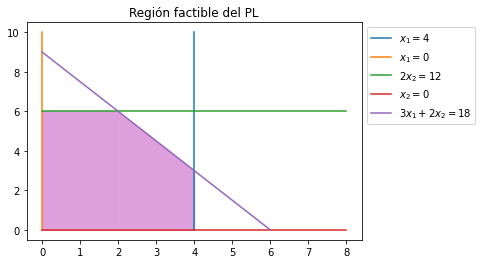

In [16]:
#x_1 ≤ 4

point1_x_1 = (4,0)

point2_x_1 = (4, 10)

point1_point2_x_1 = np.row_stack((point1_x_1, point2_x_1))

#x_1 ≥ 0
point3_x_1 = (0,0)

point4_x_1 = (0, 10)

point3_point4_x_1 = np.row_stack((point3_x_1, point4_x_1))

#2x_2 ≤ 12 or x_2 ≤ 6

point1_x_2 = (0, 6)

point2_x_2 = (8, 6)

point1_point2_x_2 = np.row_stack((point1_x_2, point2_x_2))

#x_2 ≥ 0

point3_x_2 = (0, 0)

point4_x_2 = (8, 0)

point3_point4_x_2 = np.row_stack((point3_x_2, point4_x_2))

#3x_1 + 2x_2 ≤ 18

x_1_region_1 = np.linspace(0,4, 100)

x_2_region_1 = 1/2*(18 - 3*x_1_region_1)


x_1 = np.linspace(0,6, 100)

x_2 = 1/2*(18 - 3*x_1)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
x_1_region_2 = np.linspace(0,2, 100)
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")
plt.show()


La región sombreada es la región factible. Cualquier punto que se elija en la región factible satisface las desigualdades definidas en el PL. Ahora tenemos que seleccionar dentro de la región factible el punto que maximiza el valor de la función objetivo $f_o$.

El procedimiento gráfico consiste en dar a $f_o$ algún valor arbitrario, dibujar la recta definida por tal valor  y "mover tal recta de forma paralela" en la dirección que $f_o$ crece (si se desea maximizar y en la dirección en la que $f_o$ decrece si se desea minimizar) hasta que se mantenga en la región factible.

Para la función objetivo del PL anterior queda como sigue:

$$y = 3x_1 + 5x_2$$

y vamos dando valores arbitrarios a $y$:

```{margin}

Todas las rectas tienen la misma pendiente por lo que son paralelas. Cada una de las rectas son las curvas de nivel de $f_o$

```

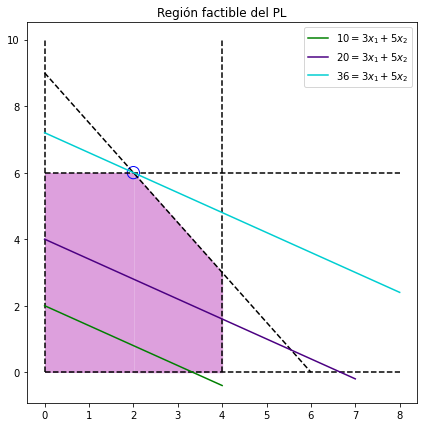

In [17]:
plt.figure(figsize=(7,7))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "--", color="black", label = "_nolegend_")
plt.plot(x_1, x_2, "--", color="black", label="_nolegend_")

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("Región factible del PL")

x_1_line_1 = np.linspace(0, 4, 100)

x_2_line_1 = 1/5*(-3*x_1_line_1 + 10)

x_1_line_2 = np.linspace(0, 7, 100)

x_2_line_2 = 1/5*(-3*x_1_line_2 + 20)

x_1_line_3 = np.linspace(0, 8, 100)

x_2_line_3 = 1/5*(-3*x_1_line_3 + 36)

plt.plot(x_1_line_1, x_2_line_1, "green",
         x_1_line_2, x_2_line_2, "indigo",
         x_1_line_3, x_2_line_3, "darkturquoise"
         )


plt.legend(["$10 = 3x_1 + 5x_2$",
            "$20 = 3x_1 + 5x_2$",
            "$36 = 3x_1 + 5x_2$"], bbox_to_anchor=(1, 1))

plt.scatter(2, 6, marker='o', s=150,
            facecolors='none', edgecolors='b')


plt.show()


Si realizamos este proceso para los valores de $y_1$ iguales a $36, 20, 10$ observamos que la recta que da el mayor valor de la $f_o$ y que se mantiene en la región factible es aquella con valor $y_1=36$. Corresponde a la pareja $(x_1, x_2) = (2, 6)$ y es la **solución óptima**. Entonces produciendo los productos $1$ y $2$ a una tasa de $2$ y $6$ lotes por semana se maximiza la ganancia siendo de 36 mil pesos. No existen otras tasas de producción que sean tan redituables como la anterior de acuerdo con el modelo.

```{admonition} Comentarios

* El método gráfico anterior sólo funciona para dos o tres dimensiones.

* El gradiente de la función objetivo nos indica la dirección de máximo crecimiento de $f_o$. En el ejemplo anterior $\nabla f_o(x) = \left [ \begin{array}{c} 3 \\ 5 \end{array} \right ]$ y tal vector apunta hacia la derecha y hacia arriba. Entonces en esa dirección es hacia donde desplazamos las rectas paralelas.

* La región factible que resultó en el ejemplo anterior se le conoce con el nombre de poliedro y es un conjunto convexo (en dos dimensiones se le nombra polígono). Es una intersección finita entre hiperplanos y semi espacios, también puede pensarse como el conjunto solución de un número finito de ecuaciones y desigualdades lineales.

```


```{admonition} Observación
:class: tip


Si se utiliza un PL con otras formas diferentes a la del ejemplo (por ejemplo variables libres en lugar de no negativas) es posible que la interpretación de "asignación de recursos limitados entre actividades que compiten" puede ya no aplicarse muy bien; pero sin importar cuál sea la interpretación o el contexto, lo único necesario es que la formulación matemática del problema se ajuste a las formas permitidas.

```

```{admonition} Ejercicio
:class: tip

Resuelve con el método gráfico el siguiente PL:

$$\displaystyle \max 2x_1 + x_2$$

$$\text{sujeto a: }$$

$$x_2 \leq 10$$

$$2x_1 + 5x_2 \leq 60$$

$$x_1 + x_2 \leq 18$$

$$3x_1 + x_2 \leq 44$$

$$x_1 \geq 0, x_2 \geq 0$$

Marca al gradiente de la función objetivo en la gráfica.
```

## Tipo de soluciones en un PL

Los puntos factibles que resultan de la intersección entre las rectas del ejemplo anterior que corresponden a las desigualdades se les nombra **soluciones factibles en un vértice (FEV)** (se encuentran en una esquina). Las soluciones FEV **no** son una combinación convexa estricta entre puntos distintos del poliedro (no caen en algún segmento de línea formado por dos puntos distintos).

También se les conoce como **puntos extremos** pero resulta más sencillo recordar FEV.

El método gráfico en la región anterior ilustra una **propiedad importante** de los PL con soluciones factibles y una región acotada: siempre tiene soluciones FEV y al menos una solución óptima, aún más, la mejor solución en un FEV debe ser una solución óptima.

###  ¿A qué le llamamos solución en un PL?

Cualquier conjunto de valores de las variables de decisión ($x_1, x_2, \dots, x_n$) se le nombra una solución y se identifican dos tipos:

* Una solución factible es aquella para la cual todas las restricciones se satisfacen.

* Una solución no factible es aquella para la cual al menos una restricción no se satisface.

En el ejemplo los puntos $(2,3)$ y $(4,1)$ son soluciones factibles y $(-1, 3), (4,4)$ son soluciones no factibles.

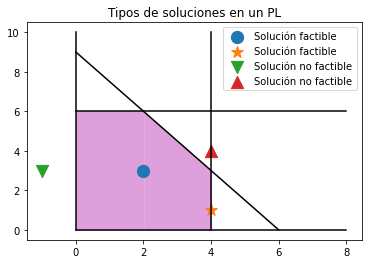

In [18]:
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], "black", label = "_nolegend_")
plt.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], "black", label = "_nolegend_")
plt.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], "black", label = "_nolegend_")
plt.plot(x_1, x_2, "black", label = "_nolegend_")


plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
plt.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

plt.scatter(2, 3, marker='o', s=150)
plt.scatter(4, 1, marker='*', s=150)
plt.scatter(-1, 3, marker='v', s=150)
plt.scatter(4, 4, marker='^', s=150)

plt.legend(["Solución factible", "Solución factible",
            "Solución no factible", "Solución no factible"])

plt.title("Tipos de soluciones en un PL")
plt.show()

```{margin}

"Valor más favorable de la función objetivo" depende si se tiene un problema de maximización o minimización.

```

De las soluciones factibles se busca aquella solución óptima (puede haber más de una) que nos dé el valor "más favorable" (valor óptimo) de la función objetivo.

### Ejemplo: más de una solución óptima

Es posible tener más de una solución óptima, por ejemplo si la función objetivo hubiera sido $f_o(x) = 3x_1 + 2x_2$ entonces:

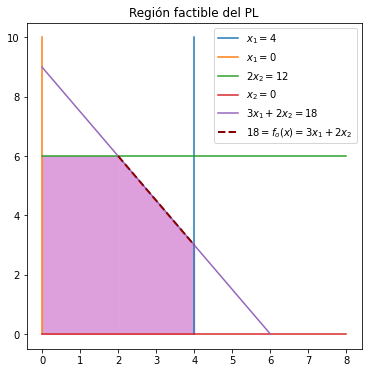

In [19]:
plt.figure(figsize=(6,6))
point4 = (2, 6)
point5 = (4, 3)

point4_point5 = np.row_stack((point4, point5))

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2)

plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")

plt.plot(point4_point5[:,0], point4_point5[:,1], 
         linewidth=2, color = "darkred", linestyle='dashed')

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$18 = f_o(x) = 3x_1 + 2x_2$"], bbox_to_anchor=(1, 1))
plt.title("Región factible del PL")
plt.show()

El segmento de recta que va de $(2,6)$ a $(4,3)$ (en línea punteada) son soluciones óptimas. Tal segmento es la curva de nivel de $f_o(x)$ con el valor $18$. Cualquier PL que tenga soluciones óptimas múltiples tendrá un número infinito de ellas, todas con el mismo valor óptimo.

```{admonition} Comentario

Si un PL tiene exactamente una solución óptima, ésta debe ser una solución FEV. Si tiene múltiples soluciones óptimas, al menos dos deben ser soluciones FEV. Por esto para resolver problemas de PL sólo tenemos que considerar un número finito de soluciones.


```

### Ejemplo: PL's sin solución

Es posible que el PL no tenga soluciones óptimas lo cual ocurre sólo si:

1.No tiene soluciones factibles y se le nombra PL **no factible**.

2.Las restricciones no impiden que el valor de la función objetivo mejore indefinidamente en la dirección favorable. En este caso se tiene un PL con función objetivo no acotada y se le nombra PL **no acotado**.


Un ejemplo de un PL no factible pues su región factible es vacía se obtiene al añadir la restricción $3x_1+ 5x_2 \geq 50$ a las restricciones anteriores:

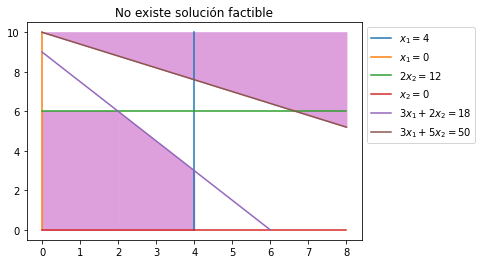

In [20]:
#3x_1 + 5x_2 ≥ 50

x_1_b = np.linspace(0,8, 100)

x_2_b = 1/5*(50 - 3*x_1_b)

plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point1_point2_x_2[:,0], point1_point2_x_2[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1],
         x_1, x_2,
         x_1_b, x_2_b)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$2x_2 = 12$", "$x_2 = 0$",
            "$3x_1+2x_2 = 18$",
            "$3x_1 + 5x_2 = 50$"], bbox_to_anchor=(1, 1))

plt.fill_between(x_1_b, x_2_b, 10, color="plum")
plt.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum")
plt.fill_between(x_1_region_2, 0, 6, color="plum")
plt.title("No existe solución factible")
plt.show()

La intersección entre las dos regiones sombreadas es vacía.

Un ejemplo de un PL no acotado resulta de sólo considerar las restricciones $x_1 \leq 4, x_1 \geq 0, x_2 \geq 0$:

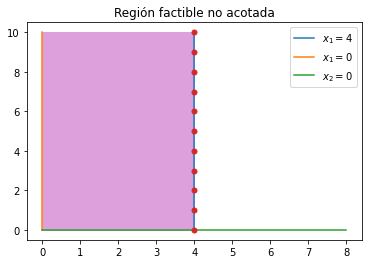

In [21]:
points = np.column_stack((4*np.ones(11), np.arange(11)))
plt.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1],
         point3_point4_x_1[:,0], point3_point4_x_1[:,1],
         point3_point4_x_2[:,0], point3_point4_x_2[:,1])

plt.plot(points[:,0], points[:,1], 'o', markersize=5)

plt.legend(["$x_1 = 4$", "$x_1 = 0$", 
            "$x_2 = 0$"], bbox_to_anchor=(1, 1))


x_1_region = np.linspace(0,4, 100)
plt.fill_between(x_1_region, 0, 10, color="plum")
plt.title("Región factible no acotada")
plt.show()


Se observa en la gráfica anterior que se tiene una región factible no acotada y como el objetivo es maximizar podemos elegir el valor $x_1 = 4$ y arbitrariamente un valor cada vez más grande de $x_2$ y obtendremos una mejor solución dentro de la región factible.

## Método símplex

Para comprender sus conceptos fundamentales se considera un PL en una forma **no estándar** y se utiliza el mismo PL del ejemplo anterior:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

### Soluciones FEV y NFEV

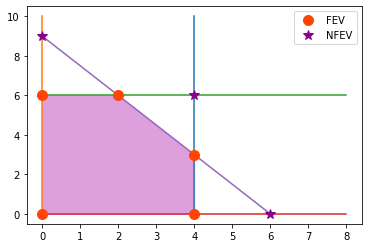

In [22]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")


ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")


point_FEV_1 = (0,0)
point_FEV_2 = (0,6)  
point_FEV_3 = (2,6) 
point_FEV_4 = (4,3) 
point_FEV_5 = (4,0)


array_FEV = np.row_stack((point_FEV_1,
                          point_FEV_2,
                          point_FEV_3,
                          point_FEV_4,
                          point_FEV_5))

point_NFEV_1 = (0, 9)
point_NFEV_2 = (4, 6)
point_NFEV_3 = (6, 0)

array_NFEV = np.row_stack((point_NFEV_1,
                           point_NFEV_2,
                           point_NFEV_3))


ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

Los puntos en la gráfica con etiqueta "FEV" son soluciones factibles en un vértice:

* $(0, 0), (0, 6), (2, 6), (4, 3), (4, 0)$


y están definidos por las restricciones de desigualdad tomando sólo la igualdad, esto es por las rectas: $x_1 = 4, 2x_2 = 12, 3x_1 + 2 x_2 = 18, x_1 = 0, x_2 = 0$. 

```{admonition} Definiciones

* A las rectas que se forman a partir de una desigualdad tomando únicamente la igualdad se les nombra **fronteras de restricción**.

* Las fronteras de restricción que definen a las FEV se les nombra **ecuaciones de definición**.

```

Análogamente los puntos con etiqueta "NFEV" son soluciones no factibles en un vértice:


* $(0, 9), (4, 6), (6,0)$

y también están definidos por las fronteras de restricción.

```{margin}

En más de dos dimensiones cada ecuación de definición genera un hiperplano en un espacio $n$ dimensional. Y la intersección de las $n$ fronteras de restricción es una solución simultánea de un sistema de $n$ ecuaciones de definición.

```

```{admonition} Comentario

En general para un PL con $n$ variables de decisión se cumple que cada solución FEV se define por la intersección de $n$ fronteras de restricción. Podría ser que se tengan más de $n$ fronteras de restricción que pasen por el vértice pero $n$ de ellas definen a la solución FEV y éstas son las ecuaciones de definición.

```

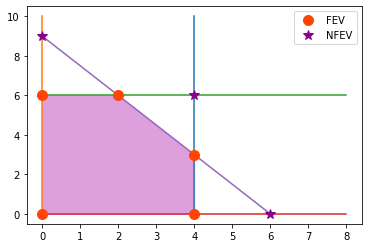

In [23]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

|Solución FEV| Ecuaciones de definición|
|:---:|:---:|
|(0,0)| $x_1 = 0, x_2 = 0$|
|(0,6)| $x_1 = 0, 2x_2 = 12$|
|(2,6)| $2x_2 = 12, 3x_1 + 2x_2 = 18$|
|(4,3)| $3x_1 + 2x_2 = 18, x_1 = 4$|
|(4,0)| $x_1 = 4, x_2 = 0$|

### FEV adyacentes

```{admonition} Definición

En un PL con $n$ variables de decisión nombramos soluciones FEV adyacentes a dos soluciones FEV que comparten $n-1$ fronteras de restricción. Las soluciones FEV adyacentes están conectadas por una arista (segmento de recta)
```

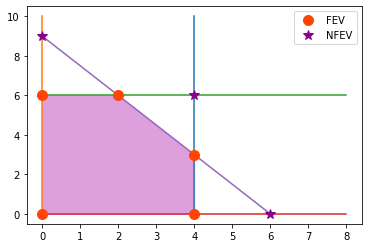

In [24]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

En el ejemplo $(0,0)$ y $(0,6)$ son adyacentes pues comparten una arista formada por la frontera de restricción $x_1=0$ y de cada solución FEV salen dos aristas, esto es tienen dos soluciones FEV adyacentes.

```{admonition} Observación
:class: tip

Aunque las soluciones en un vértice también pueden ser no factibles (NFEV) no es de importancia su análisis pues el método símplex no las revisa.

```

```{admonition} Comentario

Una razón para analizar las soluciones FEV adyacentes es la siguiente **propiedad**: 

si un PL tiene al menos una solución óptima y una solución FEV no tiene soluciones FEV adyacentes que sean mejores entonces ésa debe ser una solución óptima.

```

```{admonition} Observación
:class: tip

En el ejemplo $(2, 6)$ es un punto óptimo pues sus soluciones FEV adyacentes, $(0, 6)$, $(4,3)$ tienen un valor de la función objetivo menor (recuérdese es un problema de maximización).

```

### Pasos que sigue el método símplex

Para el ejemplo anterior el método símplex a grandes rasgos realiza lo siguiente:

**Paso inicial:** se elige $(0,0)$ como la solución FEV inicial para examinarla (esto siempre se puede hacer para problemas con restricciones de no negatividad).

```{admonition}

Más adelante se va a detallar "solución FEV adyacente que es mejor"
```

**Prueba de optimalidad:** revisar condición de optimalidad para $(0,0)$. Concluir que $(0,0)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 1:** moverse a una solución FEV adyacente mejor, para esto se realizan los pasos:

1.Entre las dos aristas de la región factible que salen de $(0,0)$ se elige desplazarse **a lo largo** de la arista que aumenta el valor de $x_2$ (con una función objetivo $f_o(x) = 3x_1 + 5x_2$ si $x_2$ aumenta entonces el valor de $f_o$ crece más que con $x_1$).

2.Detenerse al llegar a la primera frontera de restricción en esa dirección: $2x_2 = 12$ para **mantener factibilidad**.

3.Obtener la intersección del nuevo conjunto de fronteras de restricción: $(0,6)$.

```{admonition}

Más adelante se va a detallar "solución FEV adyacente que es mejor"
```

**Prueba de optimalidad**: revisar condición de optimalidad para $(0,6)$. Concluir que $(0,6)$ no es una solución óptima (existe una solución FEV adyacente que es mejor).

**Iteración 2:** moverse a una solución FEV adyacente mejor:

1.De las dos aristas que salen de $(0,6)$ moverse a lo largo de la arista que aumenta el valor de $x_1$ (para que la $f_o$ continue mejorando no podemos ir hacia abajo pues esto implicaría disminuir el valor de $x_2$ y por tanto $f_o$).

2.Detenerse al llegar a la primera frontera de restricción en esa dirección: $3x_1+2x_2 = 12$ para manterner factibilidad.

3.Obtener la intersección del nuevo conjunto de fronteras de restricción: $(2,6)$.

```{admonition}

Más adelante se va a detallar "ninguna solución FEV adyacente es mejor"
```

**Prueba de optimalidad:** revisar condición de optimalidad para $(2,6)$. Concluir que $(2,6)$ es una solución óptima (ninguna solución FEV adyacente es mejor).

### Forma aumentada de un PL

Para esta sección continuaremos con el ejemplo anterior de PL:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 \leq 4$$

$$2x_2 \leq 12$$

$$3x_1 + 2x_2 \leq 18$$

$$x_1 \geq 0, x_2 \geq 0$$

Y vamos a nombrar a las desigualdades $x_1 \leq4, 2x_2 \leq 12, 3x_1 + 2x_12 \leq 18$ **restricciones funcionales** y a las desigualdades $x_1 \geq 0, x_2 \geq 0$ **restricciones de no negatividad**.

El método símplex inicia con un **sistema de ecuaciones lineales** con lado derecho igual a $b$ (que es el lado derecho de las restricciones funcionales) y una matriz del sistema con menos renglones que columnas ($m < n$). **Asume** que las entradas de $b$ son no negativas y que el *rank* de $A$ es $m$ (esto es, de *rank* completo).

```{admonition} Observación
:class: tip

Aunque hay diversas formas de PL en las que podríamos tener lados derechos negativos o desigualdades del tipo $\geq$, es sencillo transformar de forma algebraica tales PL a una forma similar descrita en esta sección. 

```

En el ejemplo tenemos desigualdades por lo que se introducen **variables de holgura** no negativas:

$$\displaystyle \max 3x_1 + 5x_2$$

$$\text{sujeto a: }$$

$$x_1 + x_3 = 4$$

$$2x_2 + x_4 = 12$$

$$3x_1 + 2x_2 + x_5 = 18$$

$$x_1 \geq 0, x_2 \geq 0, x_3 \geq 0, x_4 \geq 0, x_5 \geq 0$$

Y en notación matricial el sistema de ecuaciones lineales es:

$$
Ax = 
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
=
b
$$

A esta forma se le nombra **forma aumentada** del PL.

```{admonition} Observación
:class: tip

Obsérvese que en la matriz de la forma aumentada se tiene una matriz identidad.

```

```{admonition} Comentario

Si una variable de holgura es igual a $0$ en la solución actual, entonces esta solución se encuentra sobre la frontera de restricción de la restricción funcional correspondiente. Un valor mayor que $0$ significa que la solución está en el lado factible de la frontera de restricción, mientras que un valor menor que $0$ señala que está en el lado no factible de esta frontera.

```

```{admonition} Observación
:class: tip

Obsérvese que las variables de holgura al iniciar el método tienen un coeficiente de $0$ en la función objetivo $f_o(x) = 3x_1 + 5x_2 = 3x_1 + 5x_2  + 0x_3 + 0x_4 + 0x_5$

```

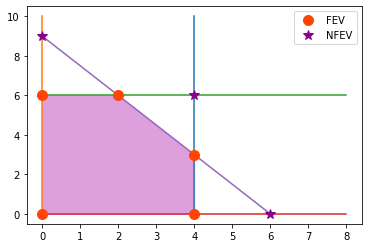

In [25]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

```{admonition} Definiciones

Una **solución aumentada** es una solución de las variables originales que se aumentó con los valores correspondientes de las variables de holgura.

Una **solución básica** es una solución FEV o NFEV aumentada.

Una **solución básica factible (BF)** es una solución FEV aumentada.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo:

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \end{array} \right ]$ es solución (de hecho factible) y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 3 \\ 2 \\ 1 \\ 8 \\ 5 \end{array} \right ]$ es solución aumentada (factible).

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 4 \\ 6 \end{array} \right ]$ es solución NFEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 4 \\ 6 \\ 0 \\ 0 \\ -6 \end{array} \right ]$ es solución básica.

* $\left [ \begin{array}{c} x_1 \\ x_2 \end{array} \right ] =  \left [ \begin{array}{c} 0 \\ 6 \end{array} \right ]$ es solución FEV y $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \\ x_5 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ es solución BF.

### Soluciones BF adyacentes

```{admonition} Definición

Dos soluciones BF son adyacentes si sus correspondientes soluciones FEV lo son. 

```

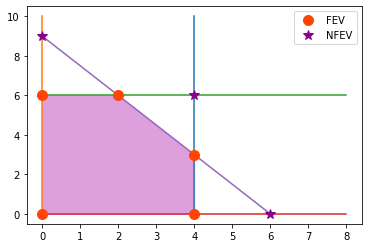

In [26]:
fig, ax = plt.subplots()

ax.plot(point1_point2_x_1[:,0], point1_point2_x_1[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_1[:,0], point3_point4_x_1[:,1], label = "_nolegend_")
ax.plot(point1_point2_x_2[:,0], point1_point2_x_2[:,1], label = "_nolegend_")
ax.plot(point3_point4_x_2[:,0], point3_point4_x_2[:,1], label = "_nolegend_")
ax.plot(x_1, x_2, label = "_nolegend_")

ax.fill_between(x_1_region_1, 0, x_2_region_1, where=x_2_region_1<=6, color="plum", label = "_nolegend_")
x_1_region_2 = np.linspace(0,2, 100)
ax.fill_between(x_1_region_2, 0, 6, color="plum", label = "_nolegend_")

ax.plot(array_FEV[:,0], array_FEV[:,1], 'o', color="orangered", markersize=10, label="FEV")

ax.plot(array_NFEV[:,0], array_NFEV[:,1], '*', color="darkmagenta", markersize=10, label="NFEV")

ax.legend()

plt.show()

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son soluciones BF adyacentes. 

### Variables básicas y no básicas

```{admonition} Definición

Dada la matriz $A \in \mathbb{R}^{m \times n}$ de la forma aumentada aquellas variables de decisión que corresponden a columnas linealmente independientes se les nombra **variables básicas**. Las restantes son **variables no básicas**.

```

Al inicio del método símplex la matriz de la forma aumentada es:

$$\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
$$

Por lo que las variables básicas son $x_3, x_4, x_5$ y las no básicas son $x_1, x_2$.

```{admonition} Definición

La matriz que se forma a partir de las columnas de $A$ que corresponden a las variables básicas se denota como $\B \in \mathbb{R}^{m \times m}$ es no singular y se nombra ***basis matrix***. La matriz que se forma con las columnas de las variables no básicas se denota con $N$ y su nombre es **nonbasis matrix**.

```

```{margin}

$$
\left [
\begin{array}{ccccc}
1 & 0 & 1 & 0 & 0 \\
0 & 2 & 0 & 1 & 0 \\
3 & 2 & 0 & 0 & 1 \\
\end{array}
\right ]
\left [
\begin{array}{c}
x_1 \\
x_2 \\
x_3 \\
x_4 \\
x_5
\end{array}
\right ]
=
\left[
\begin{array}{c}
4 \\
12 \\
18
\end{array}
\right ]
$$
```

En el ejemplo la *basis matrix* y la *nonbasis matrix* al inicio del método es:

$$B
=\left [
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right ]
$$

$$N
=
\left [
\begin{array}{ccccc}
1 & 0 \\
0 & 2 \\
3 & 2 \\
\end{array}
\right ]
$$

```{admonition} Comentarios

* Obsérvese en el ejemplo que al tener 5 variables y tres ecuaciones si se le asigna un valor arbitrario a $x_1, x_2$ entonces quedan determinadas las variables $x_3, x_4, x_5$. En el método símplex las variables no básicas se igualan a $0$ por lo que se tiene: $\left [ \begin{array}{c} x_1 \\ x_2 \\ x_3 \\ x_4 \end{array} \right ] = \left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right ]$

* Una forma de distinguir si dos soluciones BF son adyacentes es comparar qué variables no básicas (análogamente sus básicas) tienen. Si difieren en sólo una entonces son soluciones BF adyacentes. Por ejemplo: $\left [ \begin{array}{c} 0 \\ 0 \\ 4 \\ 12 \\ 18 \end{array} \right]$ y $\left [ \begin{array}{c} 0 \\ 6 \\ 4 \\ 0 \\ 6 \end{array} \right ]$ son BF adyacentes pues tienen como variables no básicas $x_1, x_2$ y $x_1, x_4$ respectivamente. Esto también se puede describir como: $x_2$ "pasa de ser no básica a básica" (análogamente $x_4$ pasa de básica a no básica). Lo anterior ayuda a PL's con más de dos variables en los que resulta más complicado o no es posible realizar el método gráfico.

* El método símplex al considerar variables no básicas con valor de $0$ indica que la restricción $x_i \leq 0$ es **activa** para $i$ en los índices de las variables no básicas.

```

```{admonition} Ejercicios
:class: tip

1.Resuelve los ejercicios y preguntas de la nota.
```


**Referencias:**

1. F. Hillier, G. Lieberman, Introduction to Operations Research, Mc Graw Hill, 2014.

2. R. K. Ahuja, T. L. Magnanti, J. B. Orlin, Network Flows, Theory, Algorithms and Applications, Prentice Hall, 1993.

1. M. S. Bazaraa, J. J. Jarvis, H. D. Sherali, Linear Programming and Network Flows, Wiley, 2010.



